## Packages importation 

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Dataset preprocessing

In [101]:
df = pd.read_csv('SPS.csv', sep=';')
df.head()

,dates,previsions
0,0,231.14
1,1,231.14
2,2,260.19
3,3,297.16
4,4,289.22


In [102]:
dataset = df[['dates','previsions']]
mask = np.random.rand(len(df))<0.5
train = dataset[mask]
test = dataset[~mask]

In [103]:
x_train = train[['dates']]
y_train = train['previsions']
x_test = test[['dates']]
y_test = test['previsions']

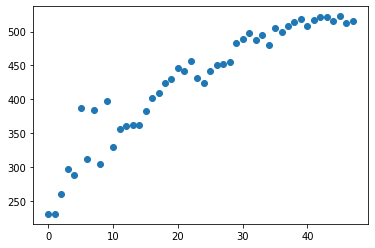

In [104]:
plt.scatter(dataset.dates,dataset.previsions)

## Training and previsualization

In [105]:
from sklearn.svm import SVR

In [111]:
model = SVR(C = 980000)
model.fit(x_train,y_train)
print('Test score :' , model.score(x_test,y_test))

Test score : 0.8491176753265491


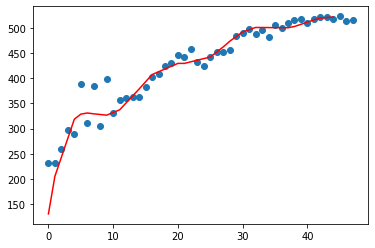

In [110]:
plt.scatter(dataset.dates,dataset.previsions)
plt.plot(x_test,model.predict(x_test),'r')

## Further previsions

[517.89014032 524.870247   536.06168166 551.11571307 569.04778566
 588.34353077 607.1407259  623.45491507 635.41244342 641.457228
 640.5053157 ]


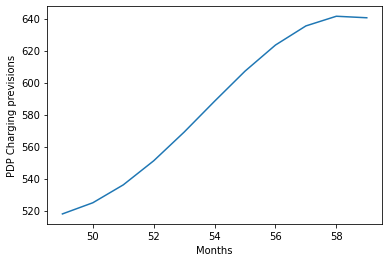

In [113]:
x = np.arange(49,60).reshape(-1,1) #As the dates of our dataset end at 48, 49 is the prévision of the next month and so on
y = model.predict(x)
print(y)
plt.plot(x,y)
plt.xlabel('Months')
plt.ylabel('PDP Charging previsions')
plt.show()